# Assignment 3
## Aman Kumar
## 1CR19CS012

# Heirarichal Clustering

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch

In [59]:
dataset = pd.read_csv('Credit Card Customer Data.csv')

In [60]:
dataset.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [68]:
X = dataset.iloc[:,[3,6]].values #select a specific row or column from the data set

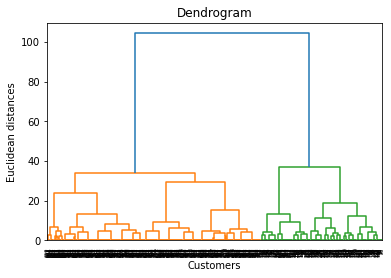

In [70]:

dendrogram = sch.dendrogram(sch.linkage(X,method = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


# Fitting hierarchical clustering to the Mall_Customes dataset
There are two algorithms for hierarchical clustering: Agglomerative Hierarchical Clustering and Divisive Hierarchical Clustering. We choose Euclidean distance and ward method for our algorithm class

In [71]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage ='ward')

In [72]:
y_hc = hc.fit_predict(X)

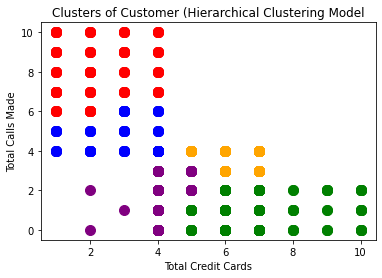

In [74]:
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='green', label='Cluster 1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='red', label='Cluster 2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='blue', label='Cluster 3')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='purple', label='Cluster 4')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='orange', label='Cluster 5')
plt.title('Clusters of Customer (Hierarchical Clustering Model')
plt.xlabel('Total Credit Cards')
plt.ylabel('Total Calls Made')
plt.show()

# Text analysis using topic modelling

In [10]:
import pandas as pd
import os

In [76]:
papers  = pd.read_csv('Reviews.csv')
#Uncomment the following lines if you are going to upload the file to Colab 
#from google.colab import files
#f = files.upload()
#papers  = pd.read_csv('papers.csv')

In [77]:
papers.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [79]:
#Cleaning
papers = papers.drop(columns=['Id', 'ProductId', 'UserId'], axis=1).sample(100)

# Print out the first rows of papers
papers.head()

,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
227639,Coolfox,1,3,1,1332547200,Lousy waste of money,I wasted my money today on these lousy treats ...
362539,H. Marshall,0,0,5,1318896000,Awesome Coffee,"This coffee is not too strong, not too weak. ..."
226005,"Faith ""Living the Red Road""",2,2,5,1270512000,Great in smoothies - Kids love it,"I love this tea, it is my favorite hot or cold..."
533963,La Piccola,9,16,2,1221436800,Not good enough,I cringed a little after reading the ingredien...
189518,merandrachsmom,1,1,5,1283212800,Great for everything!,I have ordered this several times and I LOVE i...


In [86]:
import re

#remove punctuation
papers['paper_text_processed'] = \
papers['Text'].map(lambda x: re.sub('[,\.!?]','',x)) # removing special symbols
papers.head()

,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,paper_text_processed
227639,Coolfox,1,3,1,1332547200,Lousy waste of money,I wasted my money today on these lousy treats ...,I wasted my money today on these lousy treats ...
362539,H. Marshall,0,0,5,1318896000,Awesome Coffee,"This coffee is not too strong, not too weak. ...",This coffee is not too strong not too weak Th...
226005,"Faith ""Living the Red Road""",2,2,5,1270512000,Great in smoothies - Kids love it,"I love this tea, it is my favorite hot or cold...",I love this tea it is my favorite hot or cold ...
533963,La Piccola,9,16,2,1221436800,Not good enough,I cringed a little after reading the ingredien...,I cringed a little after reading the ingredien...
189518,merandrachsmom,1,1,5,1283212800,Great for everything!,I have ordered this several times and I LOVE i...,I have ordered this several times and I LOVE i...


In [82]:
#convert to lower case and print first rows
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())
papers['paper_text_processed'].head()

227639    i wasted my money today on these lousy treats ...
362539    this coffee is not too strong not too weak  th...
226005    i love this tea it is my favorite hot or cold ...
533963    i cringed a little after reading the ingredien...
189518    i have ordered this several times and i love i...
Name: paper_text_processed, dtype: object

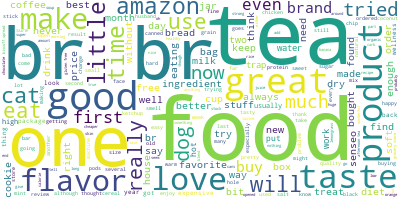

In [83]:
#Exploratory Analysis:
# To verify the preprocessing we use a word cloud 
from wordcloud import WordCloud
long_string = ','.join(list(papers['paper_text_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [84]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['wasted', 'money', 'today', 'lousy', 'treats', 'nothing', 'priced', 'paid', 'change', 'something', 'cat', 'spit', 'pill', 'cat', 'even', 'touch', 'buy', 'treats', 'pay', 'extra', 'thanks', 'nothing', 'greenies', 'bunch', 'garbage']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [85]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words # a group presenting multiple collections of text documents

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1)]


In [19]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.005*"algorithm" + 0.005*"model" + 0.004*"figure" + 0.004*"training" + '
  '0.004*"function" + 0.003*"set" + 0.003*"problem" + 0.003*"using" + '
  '0.003*"learning" + 0.003*"one"'),
 (1,
  '0.007*"algorithm" + 0.007*"model" + 0.005*"data" + 0.005*"matrix" + '
  '0.004*"time" + 0.004*"learning" + 0.004*"one" + 0.003*"function" + '
  '0.003*"using" + 0.003*"distribution"'),
 (2,
  '0.007*"function" + 0.005*"model" + 0.005*"learning" + 0.004*"algorithm" + '
  '0.004*"data" + 0.003*"value" + 0.003*"xi" + 0.003*"network" + 0.003*"two" + '
  '0.003*"using"'),
 (3,
  '0.006*"model" + 0.005*"data" + 0.005*"algorithm" + 0.004*"figure" + '
  '0.004*"learning" + 0.004*"two" + 0.004*"one" + 0.004*"set" + 0.004*"using" '
  '+ 0.004*"function"'),
 (4,
  '0.005*"model" + 0.004*"data" + 0.004*"using" + 0.004*"function" + '
  '0.004*"algorithm" + 0.004*"set" + 0.004*"matrix" + 0.003*"figure" + '
  '0.003*"time" + 0.003*"two"'),
 (5,
  '0.005*"model" + 0.005*"learning" + 0.005*"data" + 0.005*"u